## CREDIT RISK ANALYSIS <font color='black' fontSize=72>

### 1. Import of all necessary libraries <font color='black'>


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV

### 2. Reading and Dataset Visualization <font color='black'>

In [13]:
# imports dataset and visualization
dataset = pd.read_csv('credit_risk_dataset.csv')
dataset.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### 3. Dataset Info <font color='black'>

In [15]:
# dataset info
dataset.info()

# dataset dimension
display(dataset.shape)

# verify of null values
dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


(32581, 12)

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

### 4. First Visualization: Correlation Heatmap <font color='black'>

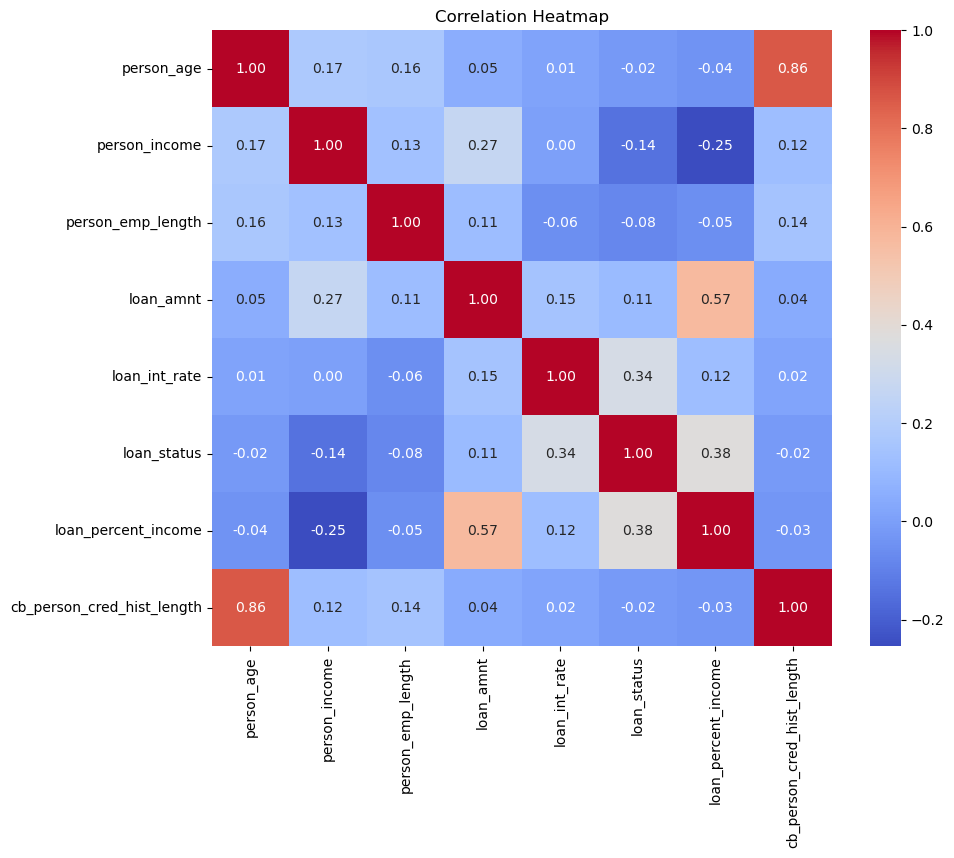

In [17]:
# calculates the correlation matrix.
numeric_cols = dataset.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_cols.corr()

# creates a heatmap to visualize correlations.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### 5. Second Visualization: Features Visualization <font color='black'>

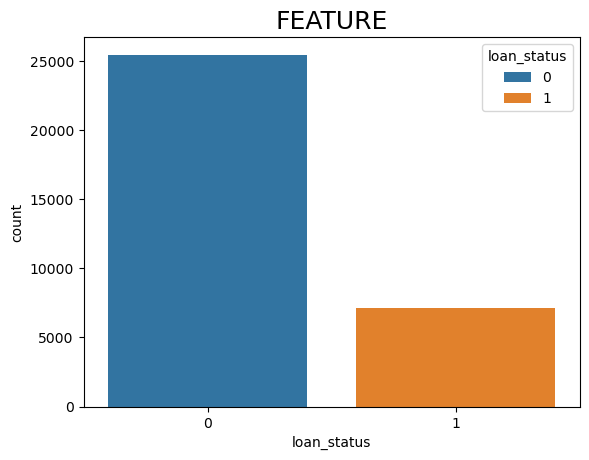

In [19]:
# features bar-plot
sns.countplot(data=dataset, x='loan_status',  hue='loan_status')
plt.title('FEATURE', fontsize=18)
plt.show()

### 6. Third Visualization: Person Home Balance <font color='black'>

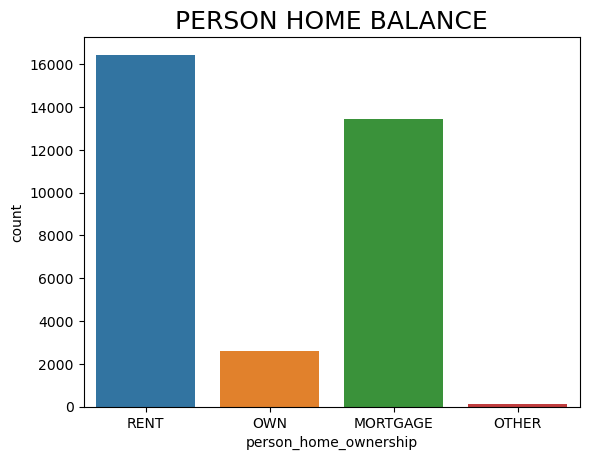

In [21]:
# person home balance bar-plot
sns.countplot(data=dataset,x='person_home_ownership', hue='person_home_ownership')
plt.title('PERSON HOME BALANCE', fontsize=18)
plt.show()

### 7. Fourth Visualization: Grade Balance <font color='black'>

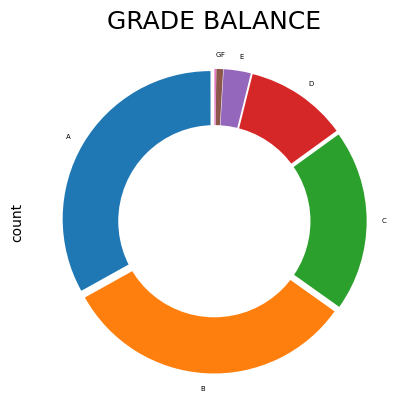

In [23]:
# grade pie chart
dataset['loan_grade'].value_counts().plot.pie(startangle=90,
                                             explode=[0.03, 0.03, 0.03, 0.03, 0.03, 0.03,0.03],
                                             textprops={'fontsize': 5})
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('GRADE BALANCE', fontsize=18)
plt.show()

### 8. Fifth Visualization: Pairplot <font color='black'>

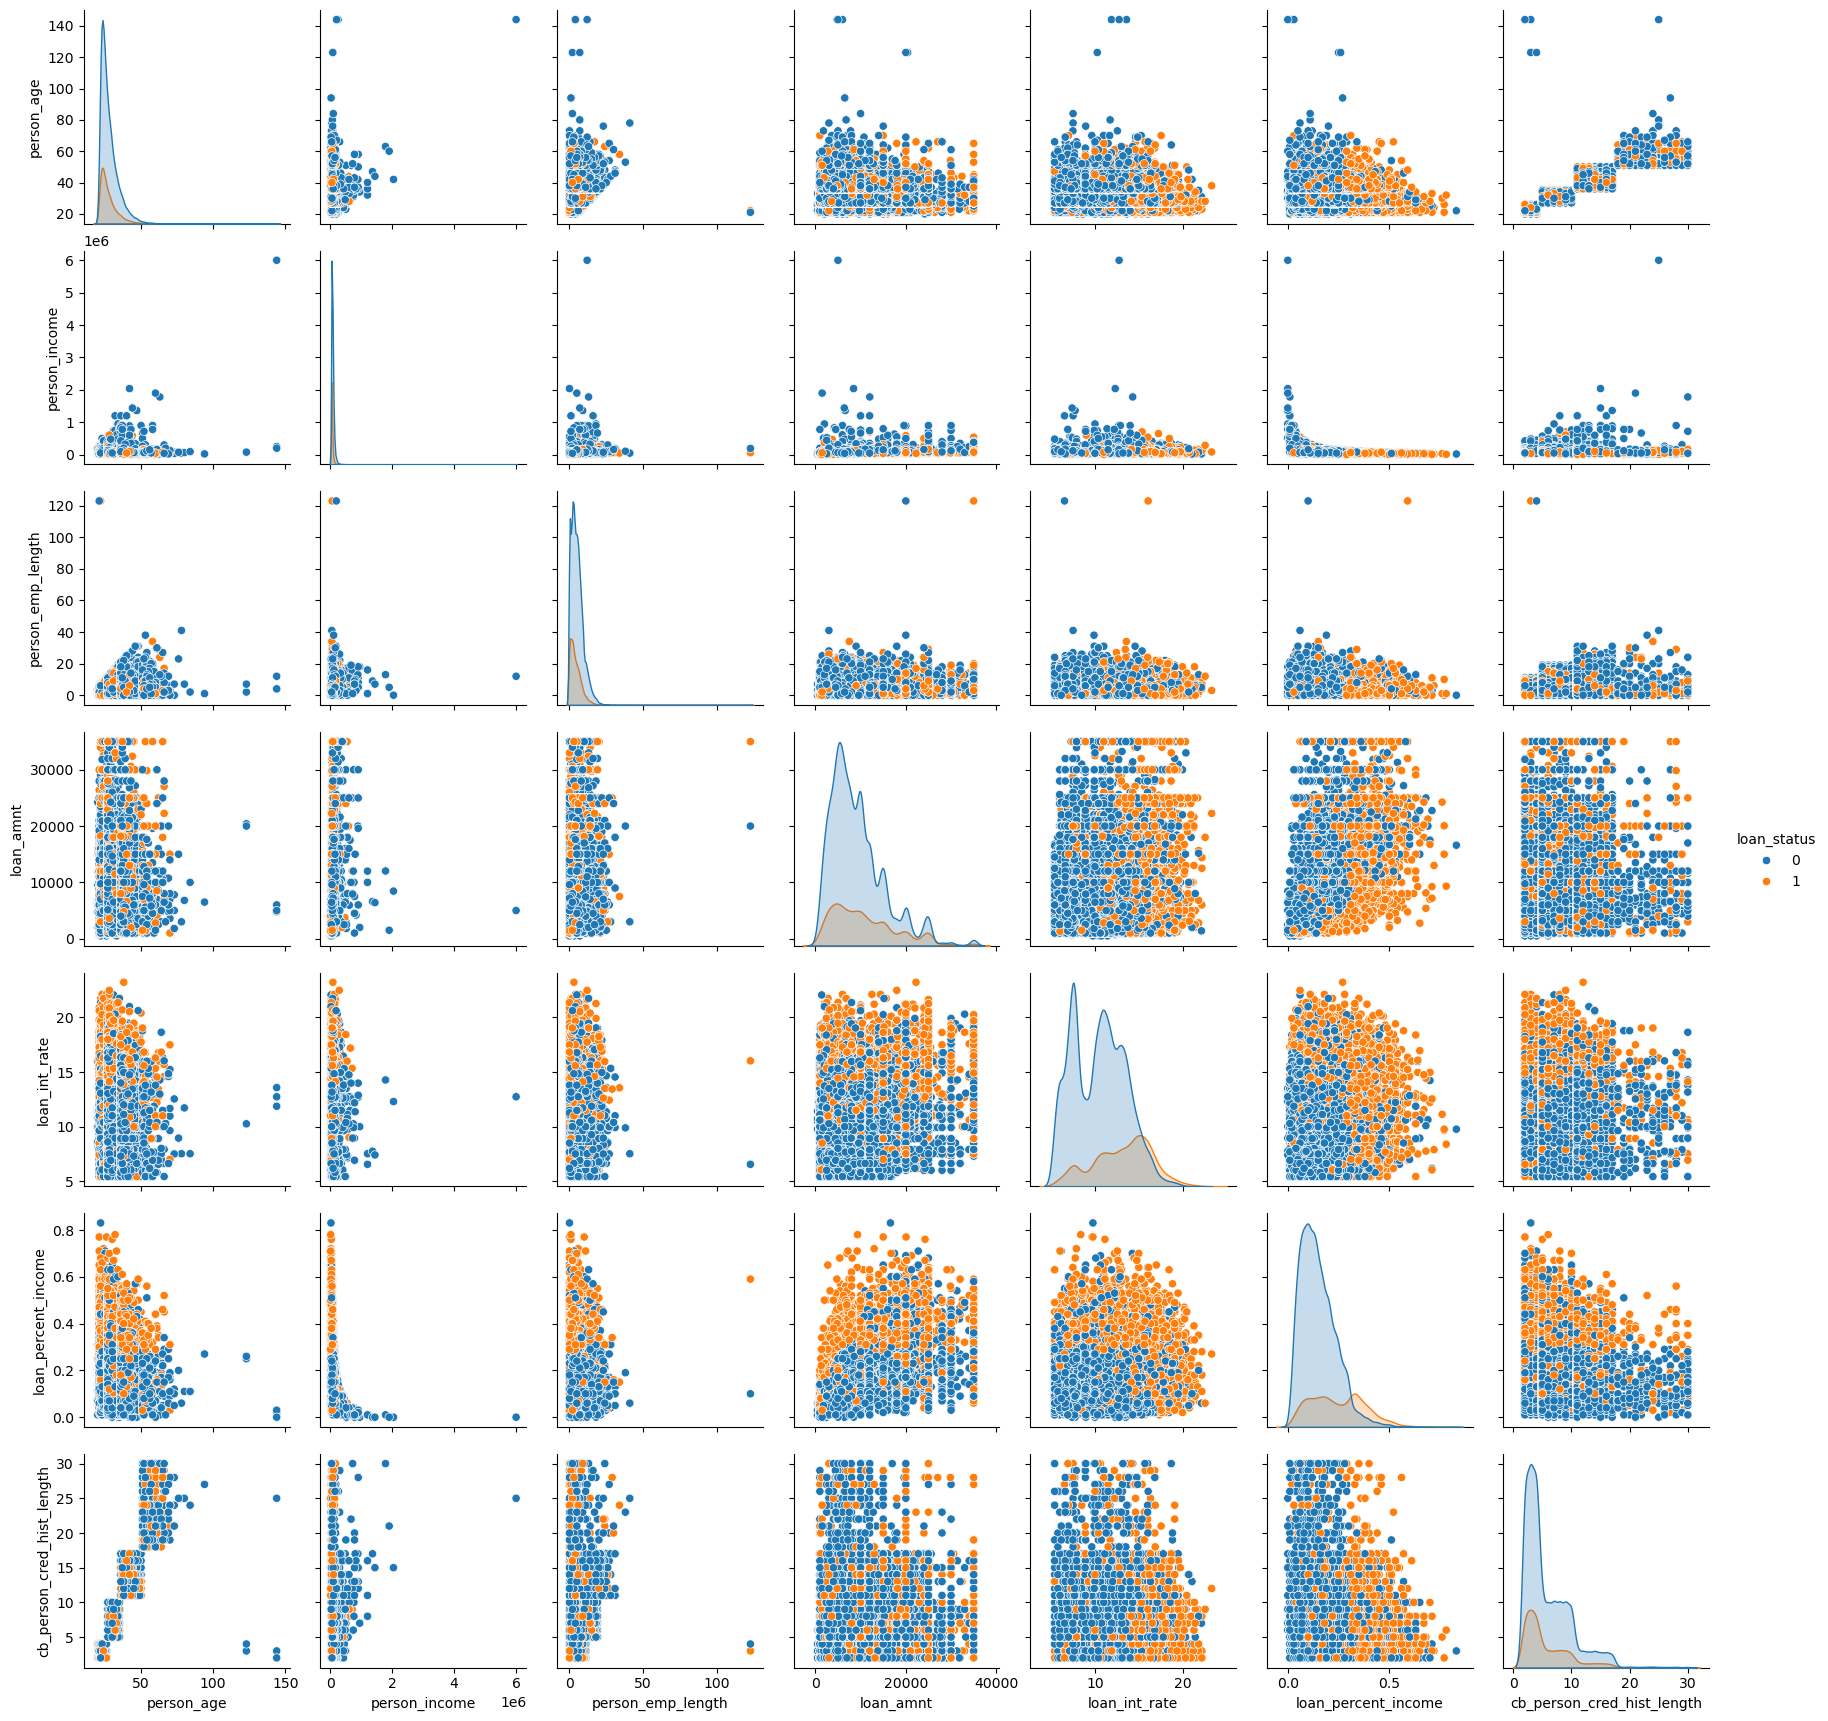

In [25]:
# features pairplot
sns.pairplot(dataset, hue='loan_status')
plt.show()

### 9. Data preprocessing <font color='black'>

duplicated rows:  165


,person_age,person_income,person_home_ownership,loan_grade,loan_amnt,loan_status,cb_person_default_on_file
0,22,59000,RENT,D,35000,1,Y
1,21,9600,OWN,B,1000,0,N
2,25,9600,MORTGAGE,C,5500,1,N
3,23,65500,RENT,C,35000,1,N
4,24,54400,RENT,C,35000,1,Y
5,21,9900,OWN,A,2500,1,N
6,26,77100,RENT,B,35000,1,N
7,24,78956,RENT,B,35000,1,N
8,24,83000,RENT,A,35000,1,N
9,21,10000,OWN,D,1600,1,N


Finding max age:  144


/var/folders/rj/bgvj9ksd2n7_6_xvrkmbc4_r0000gn/T/ipykernel_14438/3130303627.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], x=y_train, palette=['blue', 'orange'])
/var/folders/rj/bgvj9ksd2n7_6_xvrkmbc4_r0000gn/T/ipykernel_14438/3130303627.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1], x=y_resampled, palette=['blue', 'orange'])


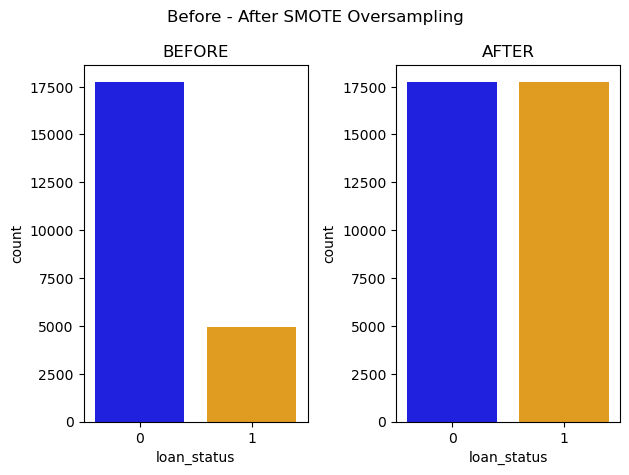

In [27]:
# counts duplicated values.

print('duplicated rows: ',dataset.duplicated().sum())

# drops duplicated rows.

dataset = dataset.drop_duplicates()

# drops non considereted columns.

dataset = dataset.drop(['loan_intent','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','person_emp_length'],axis=1)

# new visualization of dataset.

display(dataset.head(10))

# finds outliers.

print('Finding max age: ',dataset['person_age'].max())
dataset = dataset.loc[dataset['person_age'] < 101]

# preprocessing encoding: categorical values.
 
categ_values = ['loan_grade','person_home_ownership','cb_person_default_on_file']

for col in categ_values:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])

# splits dataset.

X = dataset.drop('loan_status',axis=1)
y = dataset['loan_status']

# splits dataset in train (70%), validation (20%), test (10%)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=20, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=20, stratify=y_temp)

# oversampling SMOTE for train.

smote = SMOTE(sampling_strategy='minority', random_state=20)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# before-after oversampling visualization.

fig, axes = plt.subplots(1, 2)
fig.suptitle('Before - After SMOTE Oversampling')
sns.countplot(ax=axes[0], x=y_train, palette=['blue', 'orange'])
axes[0].set_title('BEFORE')
sns.countplot(ax=axes[1], x=y_resampled, palette=['blue', 'orange'])
axes[1].set_title('AFTER')
fig.tight_layout()
plt.show()

### 10. Prediction Models <font color='black'>

In [31]:
# models definition

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'XGBoost': xgb.XGBClassifier()
}

results = {}

#saves model training in results

for name, model in models.items():
    model.fit(X_resampled, y_resampled)           
    y_pred_val = model.predict(X_val)        
    results[name] = {
        'model': model,
        'accuracy': accuracy_score(y_val, y_pred_val),
        'precision': precision_score(y_val, y_pred_val),
        'recall': recall_score(y_val, y_pred_val),
        'f1': f1_score(y_val, y_pred_val),
        'roc_auc': roc_auc_score(y_val, y_pred_val)
    }

### 11. Models Evaluation <font color='black'>

In [33]:
#creates dataframe of metrics

metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
results_df = pd.DataFrame(columns=['Metric'] + list(results.keys()))

for metric in metrics:
    row = [metric]
    for model_name in results.keys():
        row.append("{:.2f}".format(results[model_name][metric]))
    results_df.loc[len(results_df)] = row

display(results_df)

,Metric,Decision Tree,Random Forest,Logistic Regression,XGBoost
0,accuracy,0.82,0.86,0.73,0.86
1,precision,0.58,0.66,0.43,0.66
2,recall,0.72,0.75,0.77,0.77
3,f1,0.64,0.70,0.55,0.71
4,roc_auc,0.79,0.82,0.74,0.83


### 12. Cross Validation <font color='black'>

In [35]:
# selects best model from accuracy

best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
print(f"Best Model: {best_model_name} with Accuracy = {results[best_model_name]['accuracy']:.2f}")

Best Model: XGBoost with Accuracy = 0.86


### 13 Tuning Hyperparameters <font color='black'>

In [37]:
# prediction on best model

y_pred_test = best_model.predict(X_test)
print("\n--- Test Set Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_test):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_test):.2f}")

# important features of supported model

if hasattr(best_model, 'feature_importances_'):
    feature_importance = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False)
    display(feature_importance_df)
else:
    print(f"{best_model_name} does not support feature_importances_")


--- Test Set Evaluation ---
Accuracy: 0.86
F1 Score: 0.71
ROC AUC: 0.83


,Feature,Importance
3,loan_grade,0.343053
2,person_home_ownership,0.200767
5,cb_person_default_on_file,0.169142
1,person_income,0.155792
4,loan_amnt,0.100451
0,person_age,0.030796


### 14 Visualization of Models Performance <font color='black'>

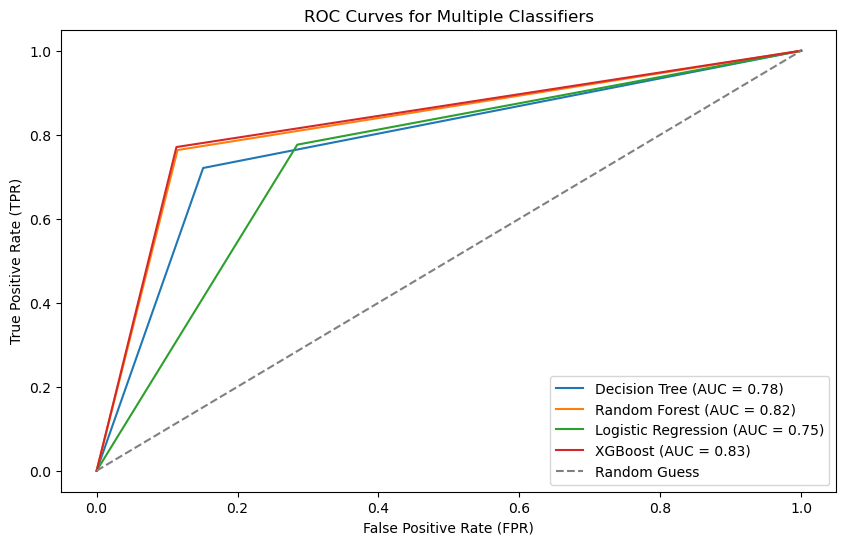

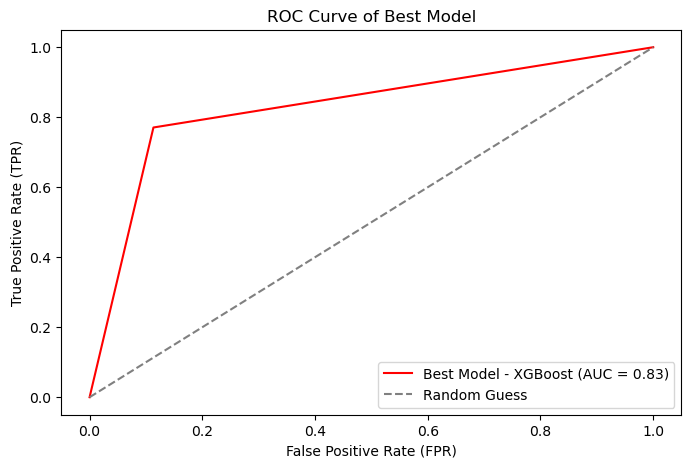

In [39]:
# ROC for each used model

plt.figure(figsize=(10,6))
for name, res in results.items():
    y_pred_test_model = res['model'].predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_test_model)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0,1],[0,1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Multiple Classifiers')
plt.legend(loc='lower right')
plt.show()

# best model ROC

fpr_best, tpr_best, _ = roc_curve(y_test, best_model.predict(X_test))
best_auc = auc(fpr_best, tpr_best)

plt.figure(figsize=(8,5))
plt.plot(fpr_best, tpr_best, label=f'Best Model - {best_model_name} (AUC = {best_auc:.2f})', color='red')
plt.plot([0,1],[0,1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve of Best Model')
plt.legend(loc='lower right')
plt.show()